# Assignment 1

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

In [197]:
dataset = pd.read_csv('SwedishMotorInsurance.csv')

#Remove all y values which are zero
dataset = dataset[dataset['Payment']!=0]

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
...,...,...,...,...,...,...,...
2172,5,7,6,9,69.70,2,32275
2173,5,7,7,1,51.24,1,31442
2174,5,7,7,2,21.74,2,31942
2179,5,7,7,7,2.83,1,966


No need to impute values or perform encoding

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [200]:
print(x_train)
print(x_test)

[[-0.62565312  1.84998649 -0.52412397 -0.40795047 -0.20997296 -0.29065836]
 [-1.34411413 -0.86808921 -0.03554612 -1.52031743 -0.16351432 -0.22323297]
 [ 1.52972989 -0.32447407  1.43018742  1.44599447  1.3218331   1.88942953]
 ...
 [ 0.09280788  1.30637135 -1.01270182  1.44599447  0.03766374  0.26672493]
 [-1.34411413  0.21914107  0.94160957  1.44599447  2.45648225  2.10968584]
 [ 0.09280788  0.76275621  0.45303172  1.07520549 -0.20835129 -0.29065836]]
[[ 0.81126889 -0.86808921 -1.01270182  0.33362751 -0.20392211 -0.27267826]
 [ 1.52972989 -0.86808921  0.94160957 -1.14952845 -0.19416436 -0.24121307]
 [-1.34411413  0.21914107 -0.52412397 -1.14952845 -0.19617413 -0.27267826]
 ...
 [-1.34411413  0.21914107 -0.03554612 -0.77873946 -0.20530045 -0.28616334]
 [ 0.09280788  0.76275621 -0.52412397  1.44599447 -0.10559464 -0.09737222]
 [-0.62565312  1.84998649  1.43018742  1.44599447  0.22969546  0.01500344]]


## Linear Regression

In [201]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [202]:
y_pred = regressor.predict(x_test)

In [203]:
regressor.score(x_test, y_test)

0.9929964220128947

In [204]:
regressor.predict(sc.transform([[1,2,3,6,365.81,16]]))

array([64515.84442506])

## Polynomial Regression

In [205]:
#Reinitialising x and y
dataset = pd.read_csv('SwedishMotorInsurance.csv')
dataset = dataset[dataset['Payment']!=0]
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [206]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
regressor2 = LinearRegression()
regressor2.fit(x_poly, y_train)
regressor2.coef_

array([ 1.51489259e-10,  1.28562878e+04,  1.74815722e+04,  4.43435653e+02,
       -1.01604754e+04,  7.03924921e+04,  1.12145531e+06, -1.44963189e+03,
        2.09610878e+02,  6.60534500e+01, -8.18182658e+02, -2.25061875e+04,
        5.18000922e+04, -1.54270431e+03,  1.10741596e+02, -1.08816531e+03,
        2.94743281e+04,  3.32290505e+04, -3.69611223e+03,  1.72021299e+03,
       -7.74901497e+03,  6.97251388e+03, -1.67390780e+03,  4.95261745e+04,
       -7.62386374e+04, -3.61304079e+03,  6.83139475e+02,  6.63670095e+03])

In [207]:
y_pred = regressor2.predict(poly_reg.transform(x_test))

In [208]:
regressor2.score(poly_reg.transform(x_test), y_test)

0.9948141527094045

## Decision Tree

In [209]:
#Reinitialising x and y
dataset = pd.read_csv('SwedishMotorInsurance.csv')
dataset = dataset[dataset['Payment']!=0]
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [210]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 0)
regressor3.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [211]:
regressor3.score(x_test,y_test)

0.9744878794957412

## Data Visualisation

In [212]:
data = pd.read_csv('SwedishMotorInsurance.csv')
y = data['Payment']

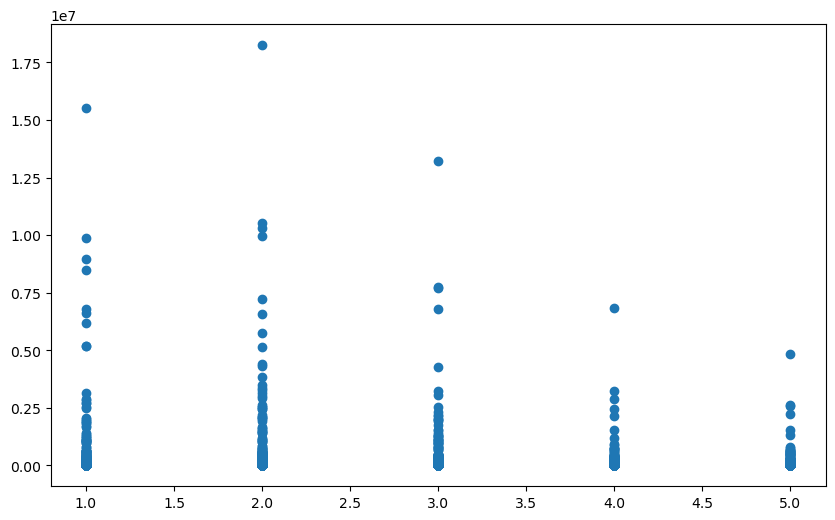

In [213]:
x = data['Kilometres']
plt.scatter(x, y)
plt.show()

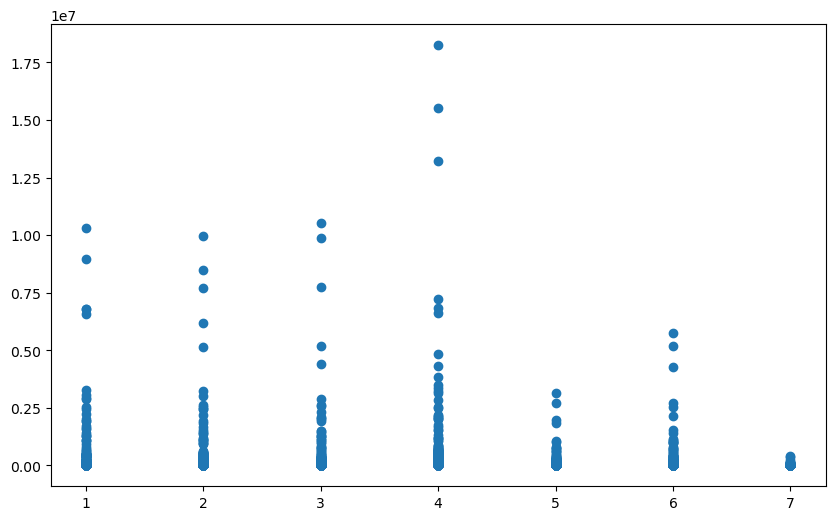

In [214]:
x = data['Zone']
plt.scatter(x, y)
plt.show()

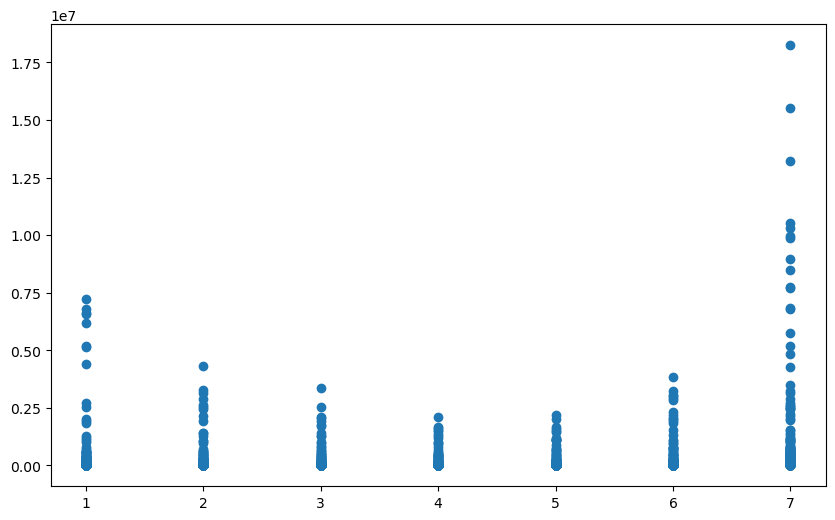

In [215]:
x = data['Bonus']
plt.scatter(x, y)
plt.show()

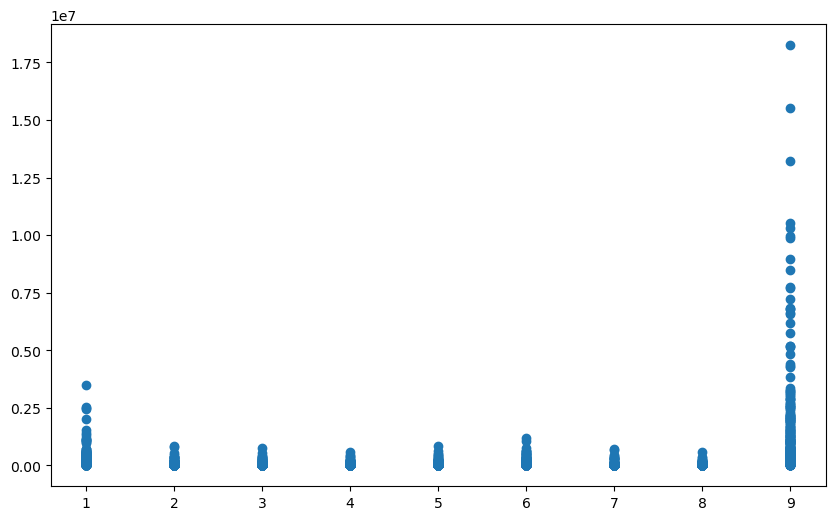

In [216]:
x = data['Make']
plt.scatter(x, y)
plt.show()

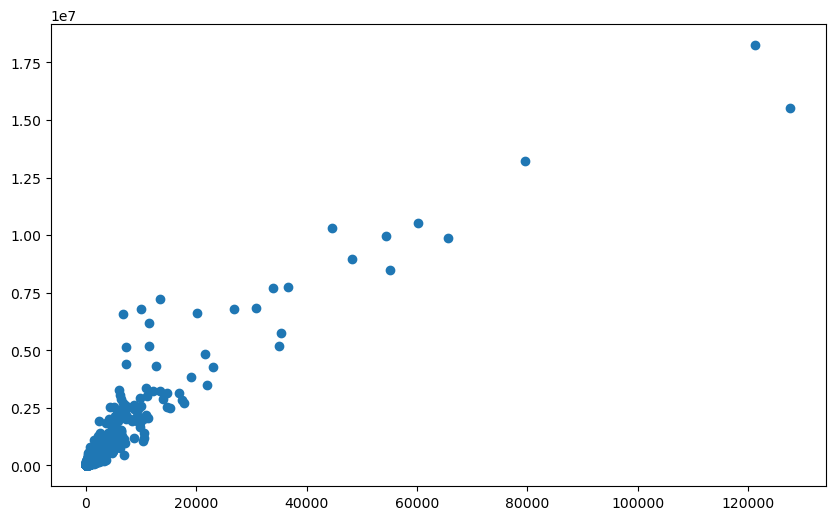

In [217]:
x = data['Insured']
plt.scatter(x, y)
plt.show()

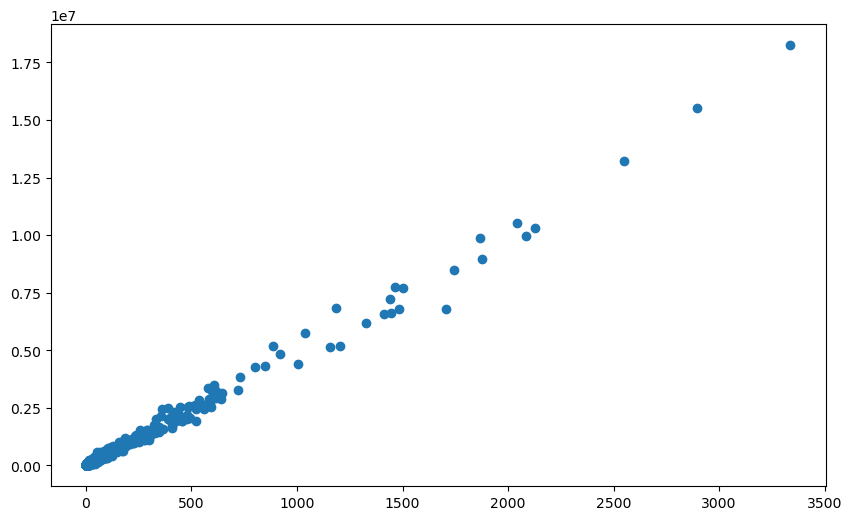

In [218]:
x = data['Claims']
plt.scatter(x, y)
plt.show()